WIP

In [204]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from datetime import datetime
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score

In [92]:
df = pd.read_csv('../data/fifa_playlist_song_data.csv')

In [93]:
def one_hot_encoding(df, column):
    '''
    :param df: dataframe containing column you wish to one hot encode
    :param column: name of column that you wish to one hot encode
    :return: dataframe with target column one hot encoded
    '''
    # perform one hot encoding and join to original dataframe
    one_hot = pd.get_dummies(df[column],prefix=column)
    df = df.drop(column, axis=1)
    df = df.join(one_hot)

    return df

In [94]:
def consolidate_genre(df, genres):
    '''
    Given dataframe with one hot encoded genre data, consolidate one hot encoding to indicate whether or not song can be grouped into one of the genres in genre.
    Eg. if a song has a genre "alternative hip hop" it will be classified as "hip hop" if "hip hop" is in genres list
    :param df: dataframe containing song genre data
    :param genres: list of genre keywords to consolidate genre data into
    :return: dataframe with consolidated one hot encoding
    '''
    for genre in genres:
        relevant_cols = []
        for col in df.columns:
            if genre in col:
                relevant_cols.append(col)
        df[genre] = df[relevant_cols].max(axis=1)
        df = df.drop(columns=relevant_cols)

    remaining_genre_cols = [col for col in df if col.startswith('genre')]
    df = df.drop(columns=remaining_genre_cols)
    return df


EDA Ideas - predict which FIFA playlist the song belongs to
- indicate if song is by smaller artist (less than 10k followers) and if song is by larger artist (10M)

In [95]:
excl_cols = ["playlist","song_name", "album_name", "album_release_date","playlist_release_date","artist_popularity","song_popularity","album_popularity"]
df_model = df.loc[:,~df.columns.isin(excl_cols)].copy(deep=True)

In [96]:
keywords = ["house","pop","hip hop","rock","indie","alternative"]
df_model = consolidate_genre(df_model, keywords)
df_model

,song_duration_ms,song_explicit,audio_danceability,audio_energy,audio_key,audio_loudness,audio_mode,audio_speechiness,audio_acousticness,audio_instrumentalness,...,audio_tempo,audio_time_signature,album_total_tracks,artist_followers,house,pop,hip hop,rock,indie,alternative
0,204591,False,0.523,0.882,5,-3.093,1,0.0364,0.108000,0.000001,...,119.947,4,1,1339643,0,1,0,1,1,0
1,213600,False,0.688,0.885,7,-6.542,1,0.0725,0.000917,0.000000,...,130.009,4,13,109656,0,1,0,0,1,1
2,166278,False,0.508,0.800,3,-4.921,0,0.3960,0.198000,0.000000,...,100.591,5,1,545298,0,1,1,0,1,0
3,181846,False,0.244,0.877,0,-3.626,1,0.0536,0.000463,0.012800,...,82.922,3,12,115136,0,1,0,0,0,0
4,322613,False,0.635,0.832,8,-6.151,1,0.0390,0.023800,0.384000,...,137.979,5,17,2408024,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,148690,True,0.825,0.716,7,-3.236,0,0.0598,0.260000,0.000000,...,140.038,4,2,2051052,0,0,0,0,0,0
486,212282,True,0.854,0.498,0,-10.270,1,0.1150,0.025500,0.000018,...,129.051,4,11,63873,0,0,1,0,0,0
487,244440,False,0.783,0.782,7,-6.590,1,0.1790,0.014800,0.000007,...,89.007,4,11,1057932,0,0,1,0,0,0
488,121089,False,0.683,0.959,6,-0.505,0,0.0560,0.080400,0.000004,...,111.035,4,11,15961,0,1,0,0,0,0


In [97]:
df_model = one_hot_encoding(df_model, "audio_key")
df_model

,song_duration_ms,song_explicit,audio_danceability,audio_energy,audio_loudness,audio_mode,audio_speechiness,audio_acousticness,audio_instrumentalness,audio_liveness,...,audio_key_2,audio_key_3,audio_key_4,audio_key_5,audio_key_6,audio_key_7,audio_key_8,audio_key_9,audio_key_10,audio_key_11
0,204591,False,0.523,0.882,-3.093,1,0.0364,0.108000,0.000001,0.0684,...,False,False,False,True,False,False,False,False,False,False
1,213600,False,0.688,0.885,-6.542,1,0.0725,0.000917,0.000000,0.0938,...,False,False,False,False,False,True,False,False,False,False
2,166278,False,0.508,0.800,-4.921,0,0.3960,0.198000,0.000000,0.0636,...,False,True,False,False,False,False,False,False,False,False
3,181846,False,0.244,0.877,-3.626,1,0.0536,0.000463,0.012800,0.4620,...,False,False,False,False,False,False,False,False,False,False
4,322613,False,0.635,0.832,-6.151,1,0.0390,0.023800,0.384000,0.2230,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,148690,True,0.825,0.716,-3.236,0,0.0598,0.260000,0.000000,0.2840,...,False,False,False,False,False,True,False,False,False,False
486,212282,True,0.854,0.498,-10.270,1,0.1150,0.025500,0.000018,0.0643,...,False,False,False,False,False,False,False,False,False,False
487,244440,False,0.783,0.782,-6.590,1,0.1790,0.014800,0.000007,0.2110,...,False,False,False,False,False,True,False,False,False,False
488,121089,False,0.683,0.959,-0.505,0,0.0560,0.080400,0.000004,0.0708,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
# dont use kmeans beacuse of amount of categorical data

In [121]:
df_model.columns

Index(['song_duration_ms', 'song_explicit', 'audio_danceability',
       'audio_energy', 'audio_loudness', 'audio_mode', 'audio_speechiness',
       'audio_acousticness', 'audio_instrumentalness', 'audio_liveness',
       'audio_valence', 'audio_tempo', 'audio_time_signature',
       'album_total_tracks', 'artist_followers', 'house', 'pop', 'hip hop',
       'rock', 'indie', 'alternative', 'audio_key_0', 'audio_key_1',
       'audio_key_2', 'audio_key_3', 'audio_key_4', 'audio_key_5',
       'audio_key_6', 'audio_key_7', 'audio_key_8', 'audio_key_9',
       'audio_key_10', 'audio_key_11'],
      dtype='object')

In [99]:
df_model.select_dtypes(include='object')

""
0
1
2
3
4
...
485
486
487
488


/Users/RyanWong/.local/share/virtualenvs/FIFA-Song-Predictions-3qHsswxH/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/RyanWong/.local/share/virtualenvs/FIFA-Song-Predictions-3qHsswxH/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/RyanWong/.local/share/virtualenvs/FIFA-Song-Predictions-3qHsswxH/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/

Text(0, 0.5, 'Distorsion')

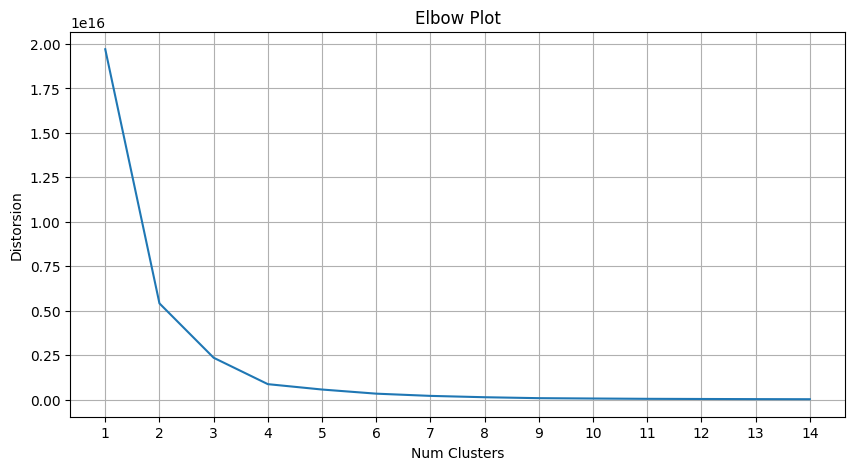

In [197]:
distorsions = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_model)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), distorsions)
plt.xticks(range(1,15))
plt.grid(True)
plt.title('Elbow Plot')
plt.xlabel('Num Clusters')
plt.ylabel('Distorsion')

In [222]:
n = 2
# KMeans
kmeans = KMeans(n_clusters=n, random_state=0, n_init="auto").fit(df_model)

# KModes
kmode = KModes(n_clusters=n, init="Huang", n_init=10, verbose=1)
clusters = kmode.fit_predict(df_model)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 155, cost: 6768.0
Run 1, iteration: 2/100, moves: 0, cost: 6768.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 160, cost: 6710.0
Run 2, iteration: 2/100, moves: 3, cost: 6710.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 48, cost: 6879.0
Run 3, iteration: 2/100, moves: 1, cost: 6879.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 144, cost: 6714.0
Run 4, iteration: 2/100, moves: 0, cost: 6714.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 215, cost: 6703.0
Run 5, iteration: 2/100, moves: 13, cost: 6703.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves

In [223]:
df_model_res = df_model.copy(deep=True)
df_model_res['kmode'] = clusters
df_model_res['kmean'] = kmeans.labels_
df_model_res['song_name'] = df['song_name']

In [224]:
df_model_res['kmode'].value_counts()

kmode
0    264
1    226
Name: count, dtype: int64

In [225]:
silhouette_score(df_model, df_model_res['kmode'])

0.031034355313448243

In [226]:
df_model_res['kmean'].value_counts()

kmean
0    486
1      4
Name: count, dtype: int64

In [227]:
silhouette_score(df_model, df_model_res['kmean'])

0.9642127207945496

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 138, cost: 6701.0
Run 1, iteration: 2/100, moves: 0, cost: 6701.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 24, cost: 6882.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 22, cost: 6799.0
Run 3, iteration: 2/100, moves: 82, cost: 6750.0
Run 3, iteration: 3/100, moves: 10, cost: 6750.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 161, cost: 6710.0
Run 4, iteration: 2/100, moves: 72, cost: 6700.0
Run 4, iteration: 3/100, moves: 0, cost: 6700.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 146, cost: 6714.0
Run 5, iteration: 2/100, moves: 0, cost: 6714.0
Best run was number 4
Init: initializing centroids
Init: init

Text(0, 0.5, 'Silhouette Score')

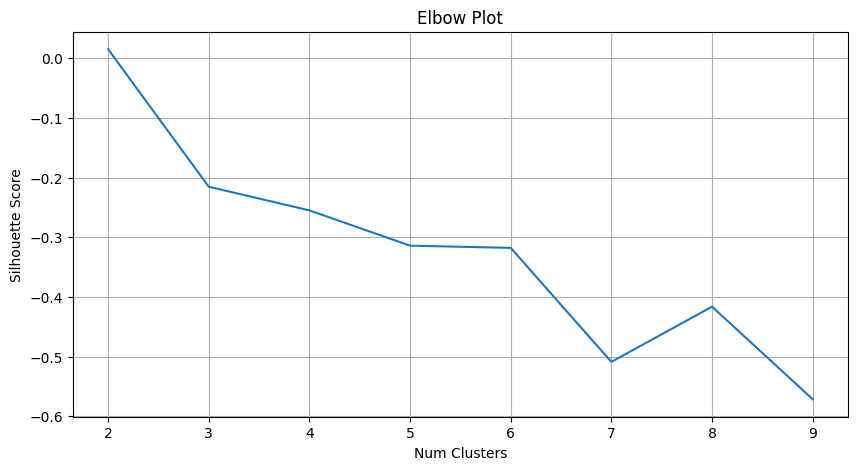

In [231]:
scores = []
for k in range(2, 10):
    kmode = KModes(n_clusters=k, init="Huang", n_init=5, verbose=1)
    clusters = kmode.fit_predict(df_model)
    score = silhouette_score(df_model, clusters)
    scores.append(score)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), scores)
plt.xticks(range(2,10))
plt.grid(True)
plt.title('Elbow Plot')
plt.xlabel('Num Clusters')
plt.ylabel('Silhouette Score')

In [187]:
df_model_res = df_model.copy(deep=True)
df_model_res['kmode'] = clusters
df_model_res['song_name'] = df['song_name']
df_model_res['cluster'].value_counts()

cluster
0    178
2    108
1    107
3     97
Name: count, dtype: int64

In [188]:
kmode.cluster_centroids_

array([[ 9.191300e+04,  0.000000e+00,  4.740000e-01,  8.160000e-01,
        -5.618000e+00,  0.000000e+00,  3.480000e-02,  2.960000e-01,
         0.000000e+00,  1.270000e-01,  8.340000e-01,  1.260200e+02,
         4.000000e+00,  1.000000e+00,  1.544197e+06,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00],
       [ 1.206260e+05,  0.000000e+00,  5.080000e-01,  7.330000e-01,
        -1.211600e+01,  1.000000e+00,  5.390000e-02,  1.190000e-02,
         0.000000e+00,  1.060000e-01,  3.710000e-01,  1.040500e+02,
         4.000000e+00,  1.000000e+00,  5.452980e+05,  0.000000e+00,
         1.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  

In [189]:
df_model

,song_duration_ms,song_explicit,audio_danceability,audio_energy,audio_loudness,audio_mode,audio_speechiness,audio_acousticness,audio_instrumentalness,audio_liveness,...,audio_key_2,audio_key_3,audio_key_4,audio_key_5,audio_key_6,audio_key_7,audio_key_8,audio_key_9,audio_key_10,audio_key_11
0,204591,False,0.523,0.882,-3.093,1,0.0364,0.108000,0.000001,0.0684,...,False,False,False,True,False,False,False,False,False,False
1,213600,False,0.688,0.885,-6.542,1,0.0725,0.000917,0.000000,0.0938,...,False,False,False,False,False,True,False,False,False,False
2,166278,False,0.508,0.800,-4.921,0,0.3960,0.198000,0.000000,0.0636,...,False,True,False,False,False,False,False,False,False,False
3,181846,False,0.244,0.877,-3.626,1,0.0536,0.000463,0.012800,0.4620,...,False,False,False,False,False,False,False,False,False,False
4,322613,False,0.635,0.832,-6.151,1,0.0390,0.023800,0.384000,0.2230,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,148690,True,0.825,0.716,-3.236,0,0.0598,0.260000,0.000000,0.2840,...,False,False,False,False,False,True,False,False,False,False
486,212282,True,0.854,0.498,-10.270,1,0.1150,0.025500,0.000018,0.0643,...,False,False,False,False,False,False,False,False,False,False
487,244440,False,0.783,0.782,-6.590,1,0.1790,0.014800,0.000007,0.2110,...,False,False,False,False,False,True,False,False,False,False
488,121089,False,0.683,0.959,-0.505,0,0.0560,0.080400,0.000004,0.0708,...,False,False,False,False,True,False,False,False,False,False


In [191]:
silhouette_score(df_model, clusters)

-0.30833963870268777

In [192]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(df_model)

In [193]:
silhouette_score(df_model, kmeans.labels_)

0.8752460609788382

In [194]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,

In [ ]:
df_model_res = df_model.copy(deep=True)
df_model_res['kmode'] = clusters
df_model_res['song_name'] = df['song_name']
df_model_res['cluster'].value_counts()